# 2.5 - Autoencoders

<a target="_blank" href="https://colab.research.google.com/github/rramosp/2021.deeplearning/blob/main/content/U2.05%20-%20Network%20Architectures%20-%20Autoencoders.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [37]:
!wget -nc --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2021.deeplearning/main/content/init.py
import init; init.init(force_download=False);

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## 1. Introduction

An autoencoder is an unsupervised lerarning method in which we seek to obtain a **LATENT REPRESENTATION** of our data, usually with reduced dimensionality.



We will be using

- **Tensorflow**. Since TF can use GPUs or TPUs if available, it is usually better to force all data types to be `np.float32` or `int`.

- The **MNIST** digits classification dataset. Observe how **we normalize** the MNIST images.

In [ ]:
mnist = pd.read_csv("local/data/mnist1.5k.csv.gz", compression="gzip", header=None).values
X=(mnist[:,1:785]/255.).astype(np.float32)
y=(mnist[:,0]).astype(int)
print("dimension de las imagenes y las clases", X.shape, y.shape)

dimension de las imagenes y las clases (1500, 784) (1500,)


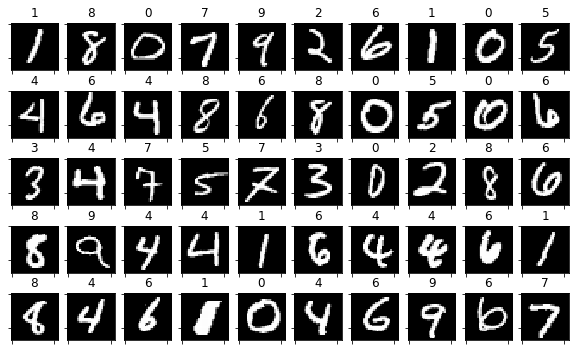

In [ ]:
perm = np.random.permutation(list(range(X.shape[0])))[0:50]
random_imgs   = X[perm]
random_labels = y[perm]
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

and we do the regular train/test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

## 2. Assembling and training an autoencoder

Observe how an autoencoder is just a concatenation of two regular `Dense` layers. **Why are we using a sigmoid as decoder output activation?**

In [78]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
import tensorflow as tf

In [79]:
def get_model(input_dim, code_size):
    inputs = Input(shape=(input_dim,), name="input")
    encoder = Dense(code_size, activation='relu', dtype=np.float32, name="encoder")(inputs)
    outputs = Dense(input_dim, activation='sigmoid', dtype=np.float32, name="decoder")(encoder)

    model = Model([inputs], [outputs])
    model.compile(optimizer='adam', loss='mse')
    return model

In [80]:
model = get_model(input_dim=X.shape[1], code_size=50)
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decoder (Dense)                 │ (None, 784)            │        39,984 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,234 (309.51 KB)

 Trainable params: 79,234 (309.51 KB)

 Non-trainable params: 0 (0.00 B)

and we simply train the autoencoder. Observe how we use the same data as input and output

In [81]:
model.fit(X_train, X_train, epochs=100, batch_size=16)

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1487
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0644
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0520
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0429
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0384
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0351
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0320
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0298
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0277
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0255
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0238
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0220
Epoch 13/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209
Epoch 14/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0195
Epoch 15/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189
Epoc

The training seems to have gone well (the loss was reduced)

**Question**: How can we measure how **_good_** was the result?

You can try with larger layers, with more layers, etc.

### Making predictions

We can feed the model any input and get the output. Observe we **get eager tensors**, which are like a symbolic wrapper to numpy matrices. We will see more about this later in this course.

In [82]:
o = model(X_train)
o

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(1200, 784))
  warnings.warn(msg)


<tf.Tensor: shape=(1200, 784), dtype=float32, numpy=
array([[3.50094751e-07, 1.94241650e-07, 8.59628955e-08, ...,
        2.07136850e-07, 8.43215844e-07, 5.10688835e-07],
       [3.22270943e-09, 3.45581626e-08, 5.86148352e-10, ...,
        1.50969122e-08, 4.10425693e-09, 1.37500294e-07],
       [1.91462179e-09, 1.35006601e-08, 2.12271578e-09, ...,
        7.72400988e-09, 3.95893807e-09, 1.30482780e-08],
       ...,
       [7.66471749e-06, 9.76466936e-07, 4.00476938e-06, ...,
        1.87887999e-05, 8.49053686e-06, 1.12413509e-04],
       [1.16530943e-11, 8.82327024e-12, 2.29403063e-12, ...,
        7.90878613e-11, 2.99862457e-12, 1.16109684e-10],
       [2.22401306e-10, 7.32814753e-10, 7.91984620e-12, ...,
        1.50693361e-10, 9.12313627e-11, 4.35173043e-11]], dtype=float32)>

in eager tensors we can access the underlying `numpy` matrix.

In [83]:
o.numpy()

array([[3.50094751e-07, 1.94241650e-07, 8.59628955e-08, ...,
        2.07136850e-07, 8.43215844e-07, 5.10688835e-07],
       [3.22270943e-09, 3.45581626e-08, 5.86148352e-10, ...,
        1.50969122e-08, 4.10425693e-09, 1.37500294e-07],
       [1.91462179e-09, 1.35006601e-08, 2.12271578e-09, ...,
        7.72400988e-09, 3.95893807e-09, 1.30482780e-08],
       ...,
       [7.66471749e-06, 9.76466936e-07, 4.00476938e-06, ...,
        1.87887999e-05, 8.49053686e-06, 1.12413509e-04],
       [1.16530943e-11, 8.82327024e-12, 2.29403063e-12, ...,
        7.90878613e-11, 2.99862457e-12, 1.16109684e-10],
       [2.22401306e-10, 7.32814753e-10, 7.91984620e-12, ...,
        1.50693361e-10, 9.12313627e-11, 4.35173043e-11]], dtype=float32)

which is equivalent to using the `predict` method

In [84]:
model.predict(X_train)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[3.50094410e-07, 1.94241466e-07, 8.59632223e-08, ...,
        2.07136850e-07, 8.43216640e-07, 5.10688835e-07],
       [3.22270943e-09, 3.45580951e-08, 5.86149518e-10, ...,
        1.50968820e-08, 4.10426493e-09, 1.37500166e-07],
       [1.91462179e-09, 1.35006344e-08, 2.12271578e-09, ...,
        7.72399567e-09, 3.95893052e-09, 1.30483029e-08],
       ...,
       [7.66471749e-06, 9.76468868e-07, 4.00476574e-06, ...,
        1.87887999e-05, 8.49053686e-06, 1.12413400e-04],
       [1.16530943e-11, 8.82328672e-12, 2.29403497e-12, ...,
        7.90881596e-11, 2.99862457e-12, 1.16109906e-10],
       [2.22401306e-10, 7.32816141e-10, 7.91987569e-12, ...,
        1.50693361e-10, 9.12310158e-11, 4.35172211e-11]], dtype=float32)

In [85]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


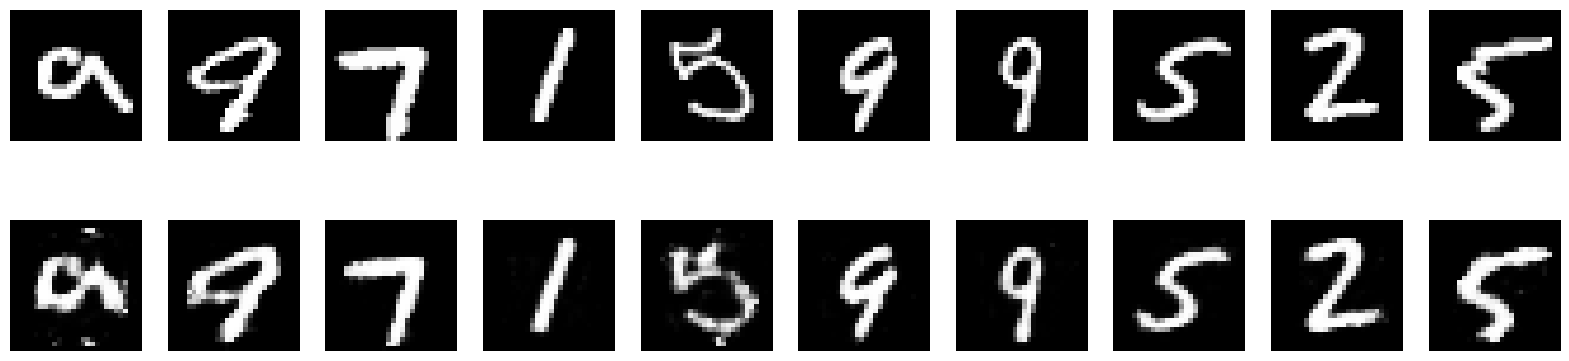

In [86]:
plt.figure(figsize=(20,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

### Accessing model layers

We can also get the output of any layer, including the final layer

In [90]:
layer_encoder = model.get_layer("encoder")
layer_decoder = model.get_layer("decoder")

m = Model(model.input, [layer_decoder.output])
m(X_train)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(1200, 784))
  warnings.warn(msg)


<tf.Tensor: shape=(1200, 784), dtype=float32, numpy=
array([[3.50094751e-07, 1.94241650e-07, 8.59628955e-08, ...,
        2.07136850e-07, 8.43215844e-07, 5.10688835e-07],
       [3.22270943e-09, 3.45581626e-08, 5.86148352e-10, ...,
        1.50969122e-08, 4.10425693e-09, 1.37500294e-07],
       [1.91462179e-09, 1.35006601e-08, 2.12271578e-09, ...,
        7.72400988e-09, 3.95893807e-09, 1.30482780e-08],
       ...,
       [7.66471749e-06, 9.76466936e-07, 4.00476938e-06, ...,
        1.87887999e-05, 8.49053686e-06, 1.12413509e-04],
       [1.16530943e-11, 8.82327024e-12, 2.29403063e-12, ...,
        7.90878613e-11, 2.99862457e-12, 1.16109684e-10],
       [2.22401306e-10, 7.32814753e-10, 7.91984620e-12, ...,
        1.50693361e-10, 9.12313627e-11, 4.35173043e-11]], dtype=float32)>

### Accessing model weights

recall that these are the weights adjusted during training

In [91]:
w = model.get_weights()
for i, wi in enumerate(w):
    print (f"weights {i}: {str(wi.shape):10s} sum {np.sum(wi):+6.2f}")

weights 0: (784, 50)  sum +1032.37
weights 1: (50,)      sum +21.02
weights 2: (50, 784)  sum -1412.92
weights 3: (784,)     sum -181.15


the same weights can also we accessed via the layers

In [92]:
for i, li in enumerate(model.layers):
    print ("layer", i, ", ".join([(str(wi.shape)+" sum %+6.2f"%(np.sum(wi.numpy()))) for wi in li.weights]))


layer 0 
layer 1 (784, 50) sum +1032.37, (50,) sum +21.02
layer 2 (50, 784) sum -1412.92, (784,) sum -181.15


In this case, we can also get a visual representation of the weights in the same image space as MNIST.

Can you tell if the autoencoder "_learnt_" something?

**TRY**: inspect the weights, **BEFORE** and **AFTER** training.

In [93]:
def show_img_grid(w):
    plt.figure(figsize=(6,6))
    for k,wi in enumerate(w):
        plt.subplot(10,10,k+1)
        plt.imshow(wi.reshape(28,28), cmap=plt.cm.Greys_r)
        plt.axis("off")

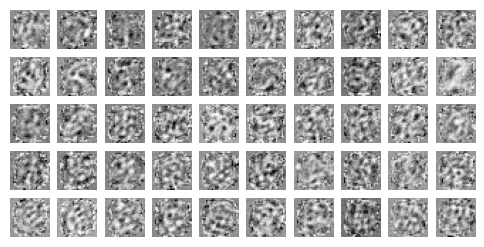

In [94]:
show_img_grid(model.get_layer("encoder").weights[0].numpy().T)

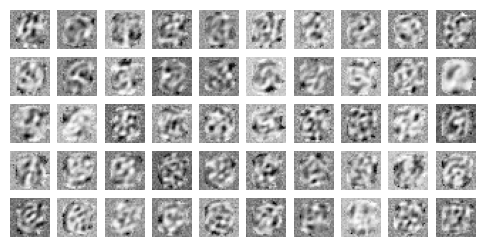

In [95]:
show_img_grid(model.get_layer("decoder").weights[0].numpy())

### Custom feeding data and extracting intermediate activations

TF offers different ways to feed in and out of specific layers. The `tensorflow.keras.backend` offers somewhat more flexiblity.

Observe how we can feed data to our autoencoder and get the activations on the **encoder**.

In [99]:
layer_input   = model.get_layer("input")
layer_encoder = model.get_layer("encoder")

me = Model(model.input, [layer_encoder.output])
me(X_train)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(1200, 784))
  warnings.warn(msg)


<tf.Tensor: shape=(1200, 50), dtype=float32, numpy=
array([[ 3.4944277 ,  9.547659  ,  8.758875  , ...,  0.        ,
         6.6768923 ,  0.        ],
       [ 3.0390263 ,  8.825412  ,  0.        , ...,  4.5940933 ,
         1.3358723 , 10.0863285 ],
       [11.384081  ,  7.3678827 ,  7.572358  , ...,  4.339612  ,
         2.3894663 ,  7.526536  ],
       ...,
       [ 7.4959702 ,  6.932205  ,  0.        , ...,  1.8435824 ,
         1.9294204 ,  4.0417094 ],
       [ 6.086721  ,  6.47563   ,  0.85536695, ...,  8.570728  ,
         9.548782  , 13.262166  ],
       [ 1.0290082 , 12.900038  ,  0.        , ...,  2.6830041 ,
         2.5218644 ,  7.783466  ]], dtype=float32)>

## 2. inspecting data in latent space (the encoder)

for one randomly chosen image

In [107]:
img = np.random.permutation(X_test)[:1]
e = me(img).numpy()
e

array([[14.162563  ,  8.111314  ,  2.5342975 ,  5.1879454 ,  4.3676615 ,
         0.        ,  9.433677  ,  1.9051679 ,  4.3265834 ,  8.516776  ,
         3.7898495 ,  1.9780695 ,  0.        , 14.168376  , 11.846095  ,
         0.        ,  1.249715  ,  7.210482  , 12.043379  , 12.735523  ,
        10.786911  ,  3.7369032 , 13.22298   , 10.142835  , 16.038643  ,
        10.149177  , 12.427222  ,  9.47407   , 10.0125475 ,  9.781037  ,
         4.5014334 ,  8.754209  , 12.881138  ,  8.685972  , 19.292715  ,
        12.003199  ,  0.        ,  5.1719694 ,  3.366579  ,  9.839557  ,
         7.8036885 ,  5.181303  ,  9.068628  ,  0.30352163,  5.2075872 ,
         8.206926  ,  9.621372  , 20.715343  ,  1.1775858 ,  5.3873854 ]],
      dtype=float32)

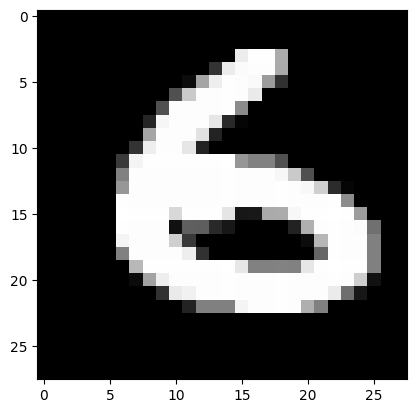

In [108]:
plt.imshow(img.reshape(28,28), cmap=plt.cm.Greys_r);

Text(0, 0.5, 'activation (ReLU)')

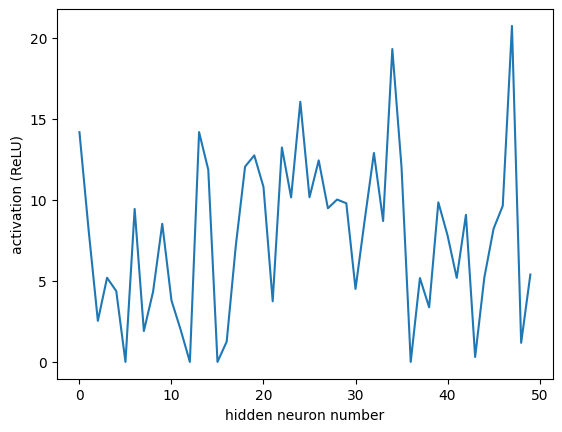

In [109]:
plt.plot(e[0])
plt.xlabel("hidden neuron number")
plt.ylabel("activation (ReLU)")

### encoder activations

or more comprehensively for a set of images. Observe we sort the images grouping all images of each class together.

- Can you see some activation patterns for different classes?
- Is there a most active neuron per class

encoded data size (200, 50)
mean activation at encoder 5.951


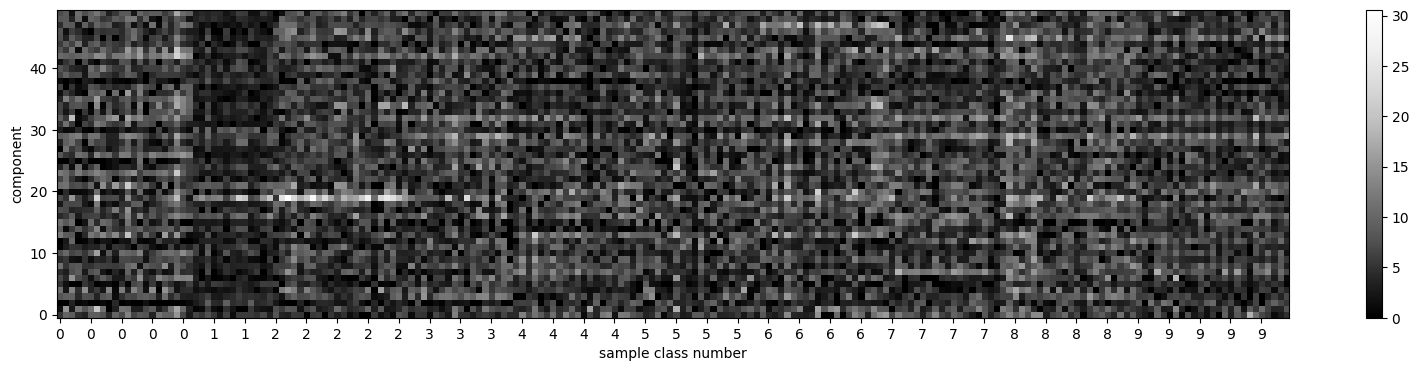

In [112]:
idxs = np.random.permutation(len(X_test))[:200]
idxs = idxs[np.argsort(y_test[idxs])]
y_sample = y_test[idxs]
X_sample = X_test[idxs]

X_sample_encoded = me([X_sample]).numpy()
print("encoded data size", X_sample_encoded.shape)
plt.figure(figsize=(20,4))
plt.imshow(X_sample_encoded.T, cmap=plt.cm.Greys_r, origin="lower")
plt.colorbar()
plt.ylabel("component")
plt.xlabel("sample class number")
plt.xticks(range(len(y_sample))[::5], y_sample[::5]);
print ("mean activation at encoder %.3f"%np.mean(X_sample_encoded))


let's get the average activation of the neurons in the latent space for each class.

**Remember however that we trained the network WITHOUT the class information (unsupervised)**

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(300, 784))
  warnings.warn(msg)


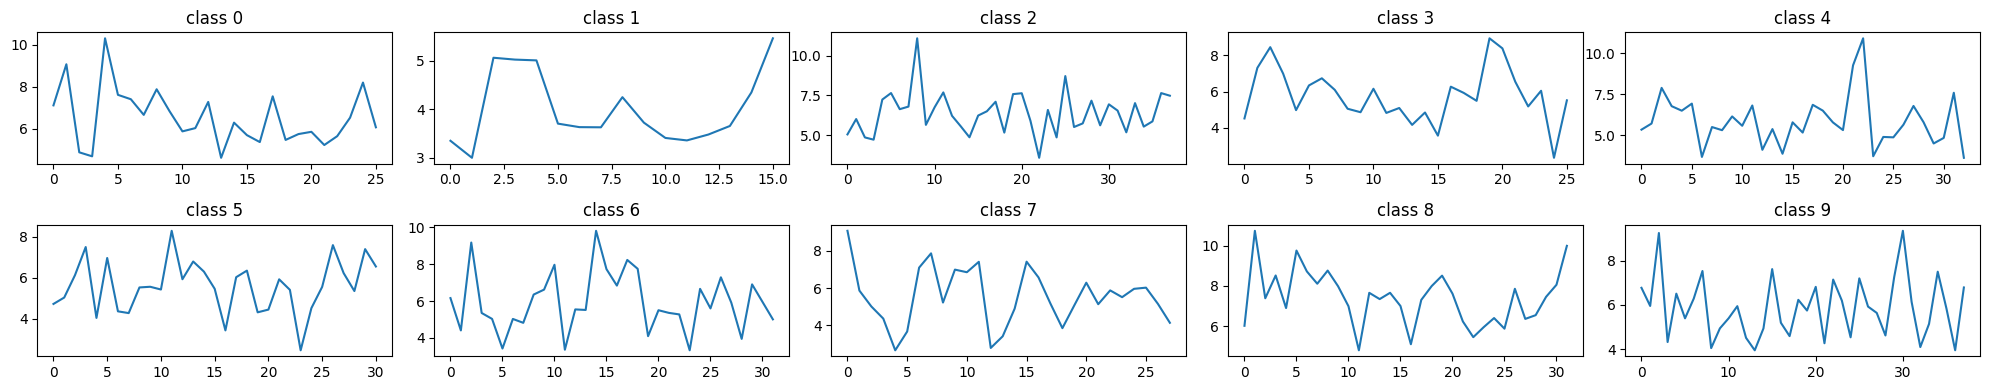

In [113]:
e = me(X_test).numpy()

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.plot(e[y_test==i].mean(axis=1))
    plt.title(f"class {i}")
plt.tight_layout()

### observe distribution of activations at the encoder

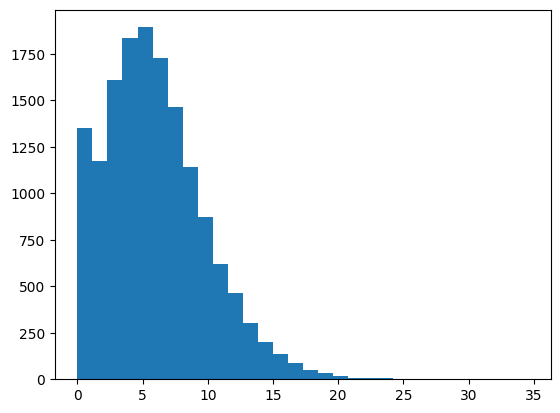

In [114]:
plt.hist(e.flatten(), bins=30);

**From this we can inspect the neuron activations in our dataset.**

for instance, we can get the average activation of the encoder neurons across all inputs

In [115]:
me(X_train).numpy().mean(axis=0)

/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input']
Received: inputs=Tensor(shape=(1200, 784))
  warnings.warn(msg)


array([ 6.1261086,  6.186819 ,  3.7819588,  6.364702 ,  5.2674127,
        3.6269636,  5.2754307,  6.40878  ,  6.16172  ,  5.639795 ,
        5.6534214,  5.044055 ,  5.127783 ,  6.9653506,  4.9933968,
        4.557195 ,  7.2931943,  5.663545 ,  6.3618054, 10.097791 ,
        6.8231506,  6.439757 ,  5.651111 ,  5.6049213,  6.286908 ,
        5.4456015,  5.520226 ,  5.251183 ,  6.64647  ,  8.671206 ,
        3.8040316,  5.932034 ,  8.858655 ,  5.059597 ,  6.378648 ,
        5.7320347,  5.328809 ,  4.665625 ,  4.211729 ,  5.445572 ,
        5.5631733,  4.5348973,  7.988807 ,  7.0627093,  4.071947 ,
        7.27021  ,  6.3530846,  6.62036  ,  4.950751 ,  6.0590334],
      dtype=float32)

## 3. Custom loss, unsupervised `.fit(X)` call $\rightarrow$ MSE

given:

- $\mathbf{x}^{(i)} \in \mathbb{R}^{784}$
- $e(\mathbf{x}^{(i)}) \in \mathbb{R}^{50}$, the encoder
- $d(e(\mathbf{x}^{(i)})) \in \mathbb{R}^{784}$, the decoder

we define the loss function as (MSE):

$$\text{loss}(\mathbf{x}^{(i)}) = \frac{1}{m}\sum_m \big(\mathbf{x}^{(i)} - d(e(\mathbf{x}^{(i)}))\big)^2$$

and implement it by hand, instead of using the prebuilt implementation

In [152]:
import tensorflow as tf

class MSELoss(tf.keras.losses.Loss):
    def call(self, a,b):
        return tf.reduce_mean( (a-b)**2)


def get_model_U(input_dim, code_size):
    inputs = Input(shape=(input_dim,), name="input")
    encoder = Dense(code_size, activation='relu', name="encoder")(inputs)
    outputs = Dense(input_dim, activation='sigmoid', name="output")(encoder)

    model = Model([inputs], [outputs])
    model.compile(optimizer='adam', loss=MSELoss())
    return model

In [150]:
model = get_model_U(input_dim=X.shape[1], code_size=40)
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ encoder (Dense)                 │ (None, 40)             │        31,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 784)            │        32,144 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,544 (248.22 KB)

 Trainable params: 63,544 (248.22 KB)

 Non-trainable params: 0 (0.00 B)

observe `.fit` call is now unsupervised (hence, the warning above)

In [151]:
model.fit(X_train, X_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1880
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0728
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0648
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0584
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0523
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0472
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0431
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0409
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0390
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0364
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0350
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0333
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0320
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0309
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296
Epoc

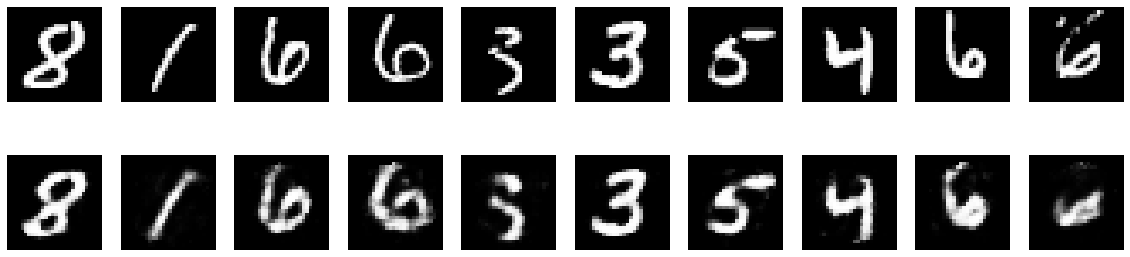

In [ ]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)

plt.figure(figsize=(20,5))
for i in range(len(X_sample)):
    plt.subplot(2,len(X_sample),i+1)
    plt.imshow(X_sample[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample),len(X_sample)+i+1)
    plt.imshow(X_pred[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

## 4. Autoencoder for image denoising

observe reconstruction when fed with noisy data


In [153]:
def add_noise(x, noise_level=.2):
    return x + np.random.normal(size=x.shape)*noise_level

In [154]:
X_sample = np.random.permutation(X_test)[:10]
X_pred   = model.predict(X_sample)
X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = model.predict(X_sample_noisy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


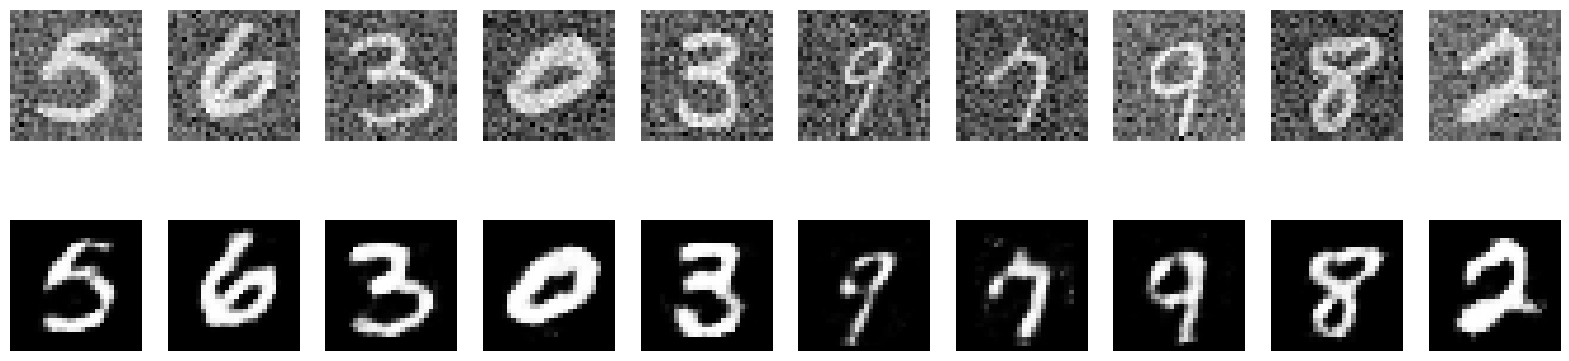

In [155]:
plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")

### in a more real scenario we only have noisy data to train the model


In [156]:
n_model = get_model(input_dim=X.shape[1], code_size=40)
X_train_noisy = add_noise(X_train)

n_model.fit(X_train_noisy, X_train_noisy, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2293
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1116
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1055
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0979
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0924
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0875
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0831
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0810
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0780
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0763
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0747
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0734
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0720
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0711
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0683
Epoc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


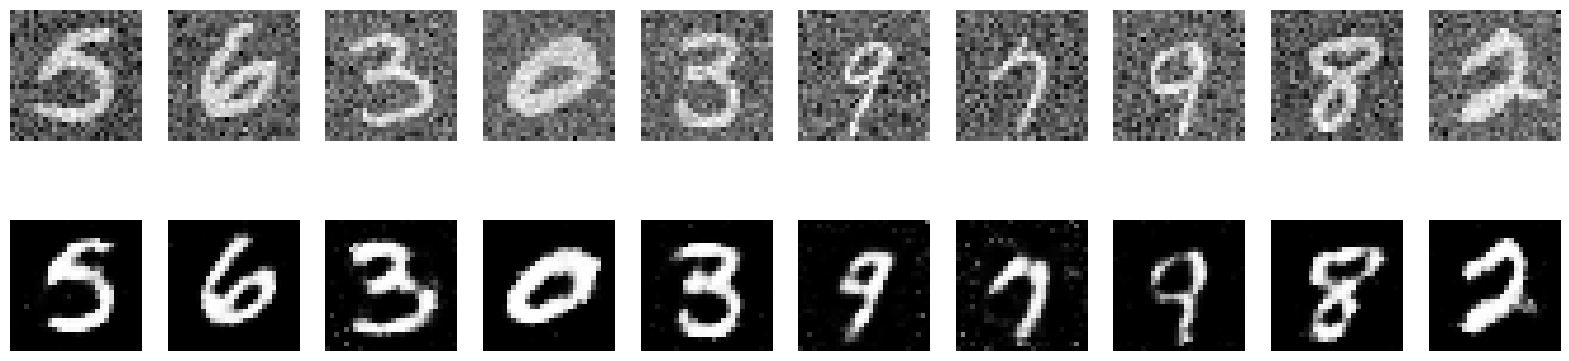

In [157]:
X_sample_noisy = add_noise(X_sample)
X_pred_noisy   = n_model.predict(X_sample_noisy)

plt.figure(figsize=(20,5))
for i in range(len(X_sample_noisy)):
    plt.subplot(2,len(X_sample_noisy),i+1)
    plt.imshow(X_sample_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")
    plt.subplot(2,len(X_sample_noisy),len(X_sample_noisy)+i+1)
    plt.imshow(X_pred_noisy[i].reshape(28,28), cmap=plt.cm.Greys_r)
    plt.axis("off")